In [56]:
# packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit


from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

# Get data

In [2]:
df = pd.read_csv("../data/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# Get categorical and numerical variables

In [6]:
def get_catcols(df):

    cat_cols = [col for col in df.columns if df[col].dtypes == "O"]   
    return cat_cols

def get_numcols(df):  

    num_cols = [col for col in df.columns if (df[col].dtypes != "O")]
    return num_cols

In [7]:
cat_cols = get_catcols(df)
cat_cols

['ocean_proximity']

In [8]:
num_cols = get_numcols(df)
num_cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [9]:
df["ocean_proximity"].value_counts() # categorical var.

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# Data visualization

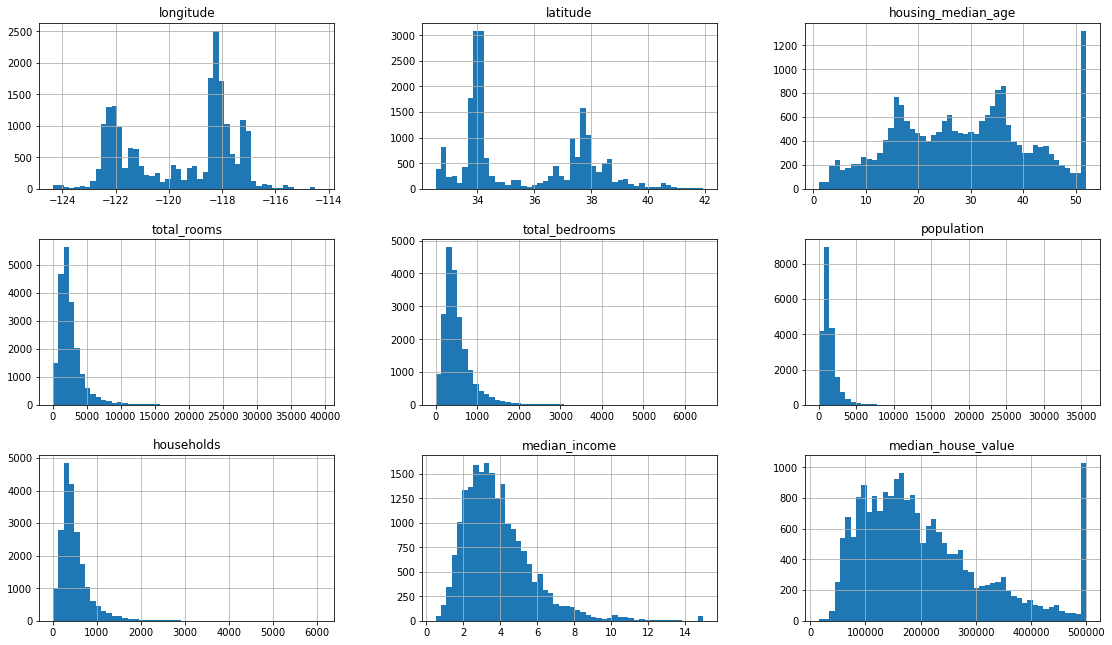

In [10]:
df.hist(bins=50, figsize=(19, 11))
plt.show()

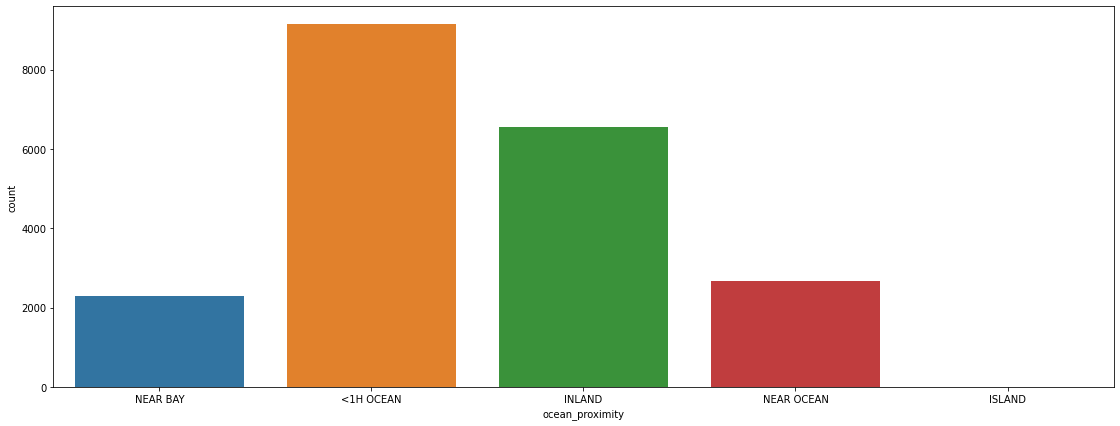

In [11]:
plt.figure(figsize = (19, 7))
sns.countplot(x = "ocean_proximity", data = df); 

In [12]:
t = pd.crosstab(df["ocean_proximity"], "freq", normalize=True)
t = t.assign(type = t.index, freq = 100 * t.freq)
t

col_0,freq,type
ocean_proximity,,
<1H OCEAN,44.263566,<1H OCEAN
INLAND,31.739341,INLAND
ISLAND,0.024225,ISLAND
NEAR BAY,11.094961,NEAR BAY
NEAR OCEAN,12.877907,NEAR OCEAN


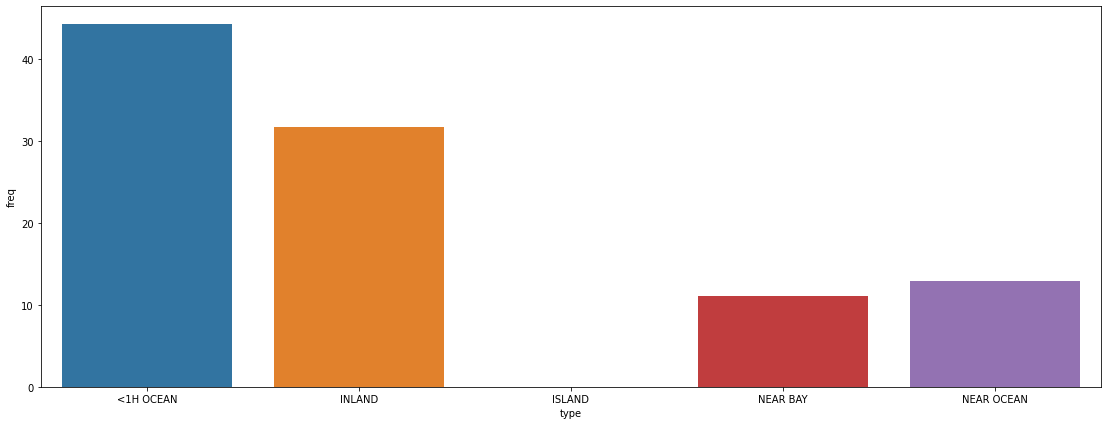

In [13]:
plt.figure(figsize = (19, 7))
sns.barplot(x = "type", y = "freq", data = t);

# Correlations

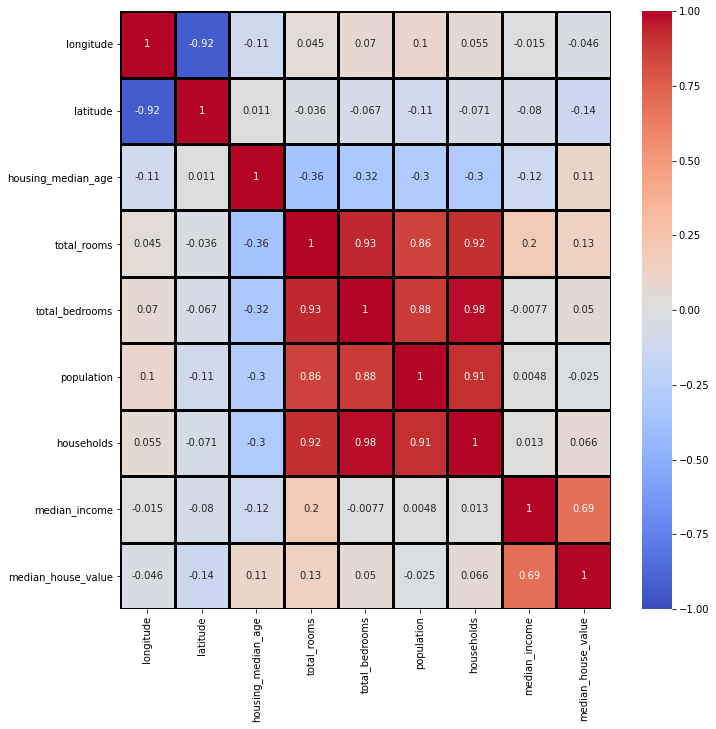

In [14]:
plt.figure(figsize=(11,11))

sns.heatmap(df.corr(), annot = True,vmin=-1, vmax=1,
            center= 0,cmap= 'coolwarm',linewidths=3, linecolor='black');

# Median_income column

In [15]:
df['median_income'].min(), df['median_income'].max()

(0.4999, 15.0001)

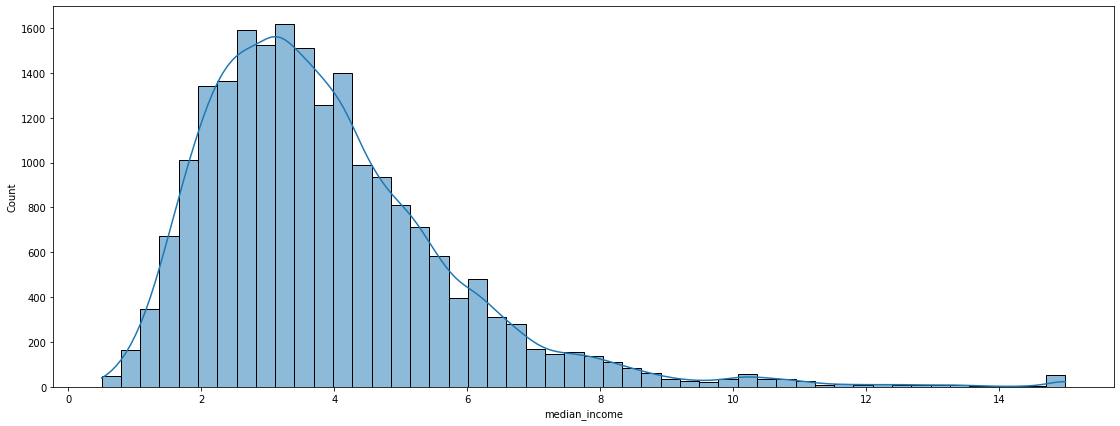

In [16]:
plt.figure(figsize = (19, 7))
sns.histplot(df['median_income'], kde=True, bins= 50);

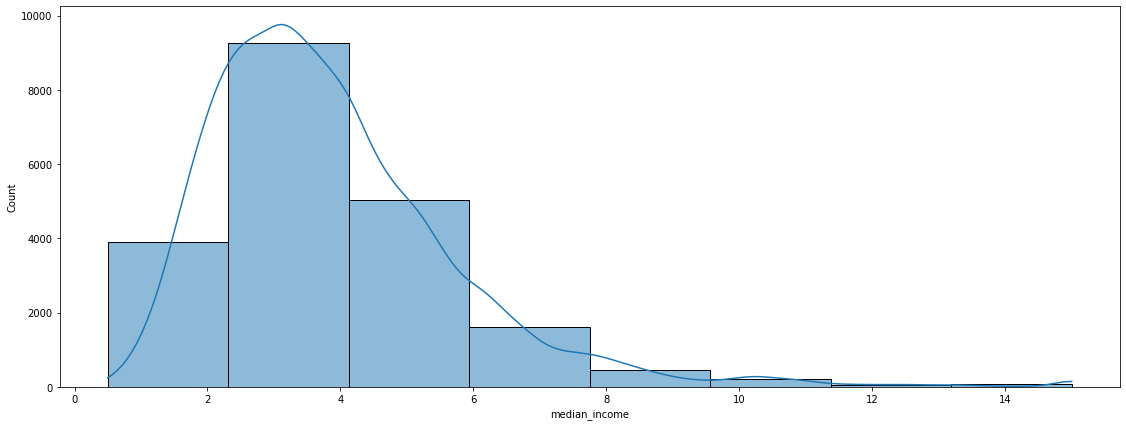

In [17]:
plt.figure(figsize = (19, 7))
sns.histplot(df['median_income'], kde=True, bins= 8);

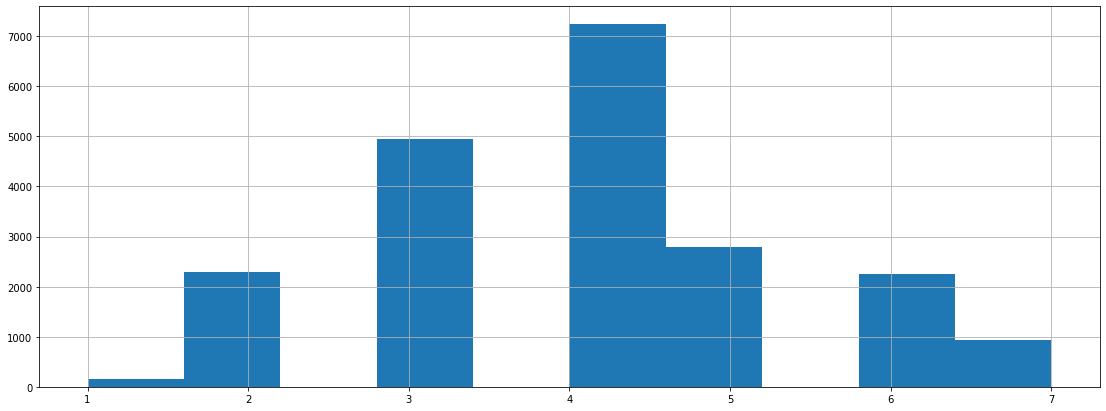

In [18]:
# split into bins
df['income_cat'] = pd.cut(df['median_income'], 
                          bins=[0.5, 1, 2, 3.0, 4.5, 5.5, 7.5, np.inf], labels=[1, 2, 3, 4, 5, 6, 7])

plt.figure(figsize = (19, 7))
df['income_cat'].hist()
plt.show()

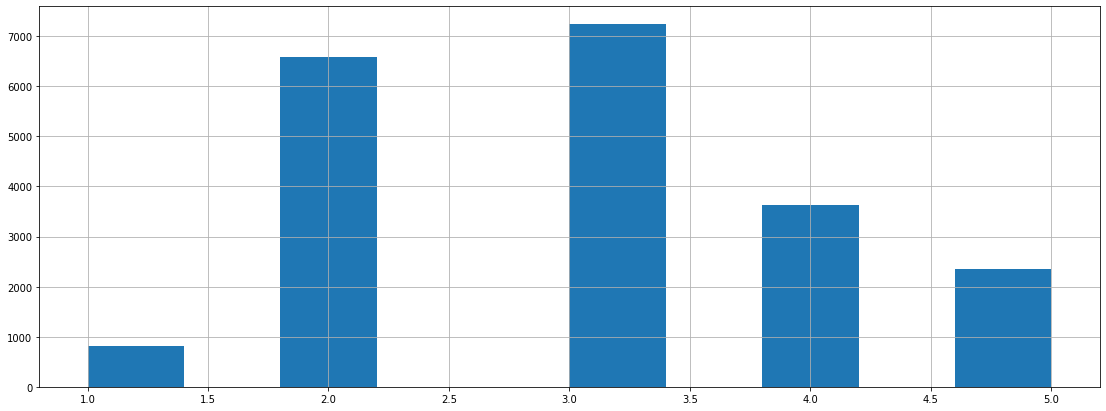

In [19]:
df['income_cat'] = pd.cut(df['median_income'], 
                          bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

plt.figure(figsize = (19, 7))
df['income_cat'].hist()
plt.show()

# Model trainging

# Median_house_value column

In [20]:
df['median_house_value'].min(), df['median_house_value'].max()

(14999.0, 500001.0)

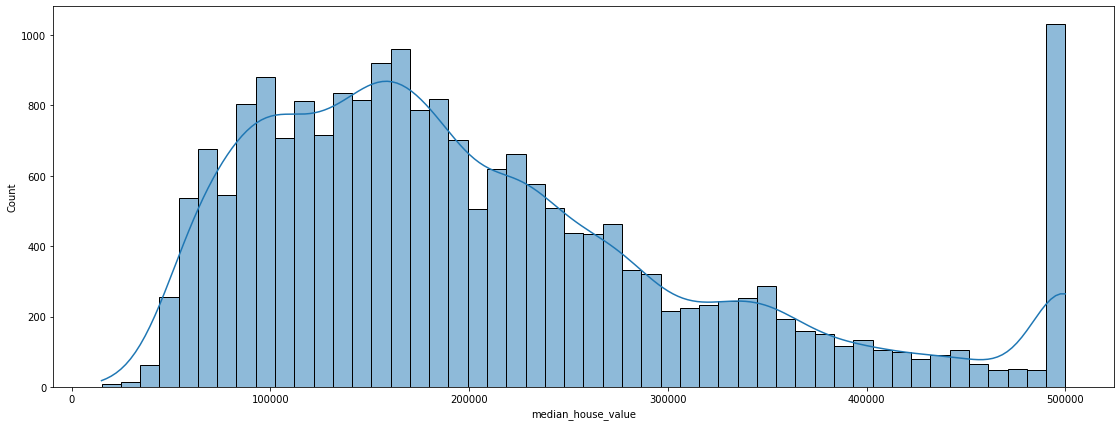

In [21]:
plt.figure(figsize = (19, 7))
sns.histplot(df['median_house_value'], kde=True, bins= 50);

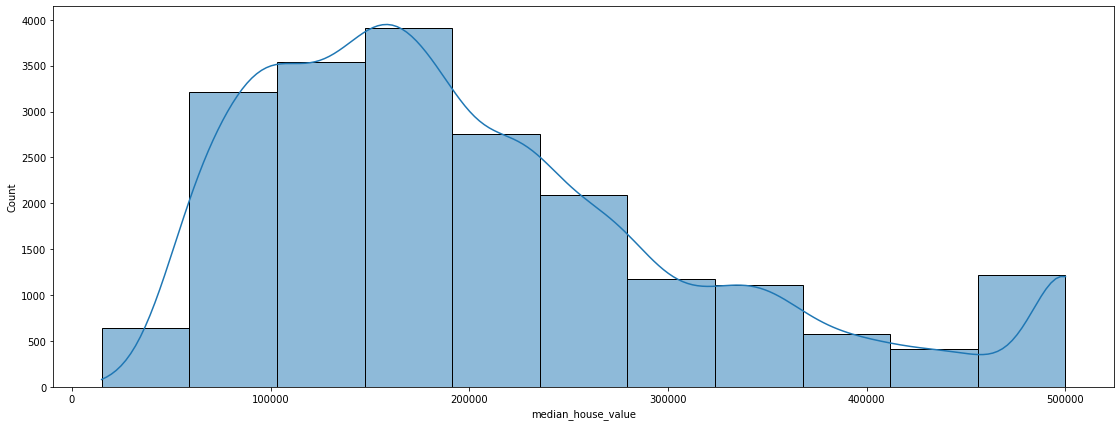

In [22]:
plt.figure(figsize = (19, 7))
sns.histplot(df['median_house_value'], kde=True, bins= 11);

# Split data

## Split data

In [23]:
train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)
print( train_set.shape, test_set.shape)

(14448, 11) (6192, 11)


In [24]:
print(test_set['income_cat'].value_counts() ) #/ len(test_set)

3    2186
2    1993
4    1056
5     704
1     253
Name: income_cat, dtype: int64


In [25]:
print(train_set['income_cat'].value_counts() ) #/ len(train_set)

3    5050
2    4588
4    2583
5    1658
1     569
Name: income_cat, dtype: int64


## Stratify sampling based on income category

In [26]:
# to perform stratified sampling based on income category. 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

    
print( strat_train_set.shape, strat_test_set.shape)   
print(strat_test_set['income_cat'].value_counts() ) #/ len(strat_test_set)

(14448, 11) (6192, 11)
3    2171
2    1974
4    1092
5     708
1     247
Name: income_cat, dtype: int64


In [27]:
print(strat_train_set['income_cat'].value_counts() ) #/ len(strat_train_set)

3    5065
2    4607
4    2547
5    1654
1     575
Name: income_cat, dtype: int64


In [28]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)
housing = strat_train_set.copy()

In [29]:
print(housing.shape)
housing.head(2)

(14448, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8577,-118.41,33.89,31.0,1428.0,320.0,677.0,331.0,7.2316,500001.0,<1H OCEAN
5960,-117.83,34.11,29.0,2671.0,437.0,1484.0,445.0,4.9844,203000.0,INLAND


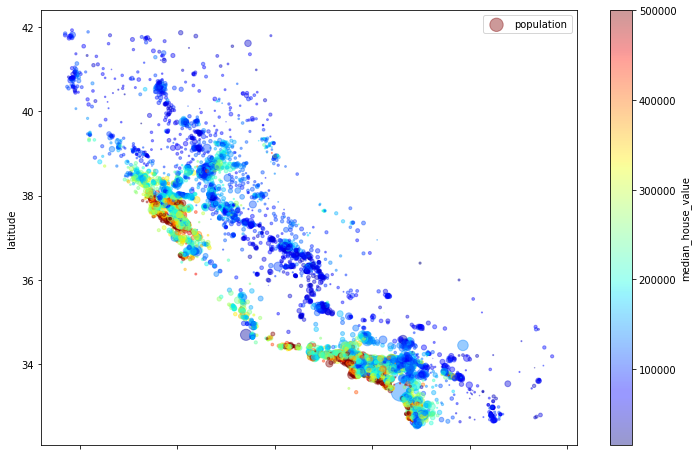

In [30]:
housing.plot(kind='scatter', 
             x='longitude', y='latitude', 
             alpha=0.4, 
             s=housing['population']/100, 
             label='population',figsize=(12, 8), 
             c='median_house_value', 
             cmap=plt.get_cmap('jet'), colorbar=True)

plt.legend()
plt.show()

# Correlations

In [31]:
corr_matrix = housing.corr()
print(corr_matrix.median_house_value.sort_values(ascending=False))

median_house_value    1.000000
median_income         0.687873
total_rooms           0.136801
housing_median_age    0.116305
households            0.066788
total_bedrooms        0.049523
population           -0.024592
longitude            -0.052345
latitude             -0.137864
Name: median_house_value, dtype: float64


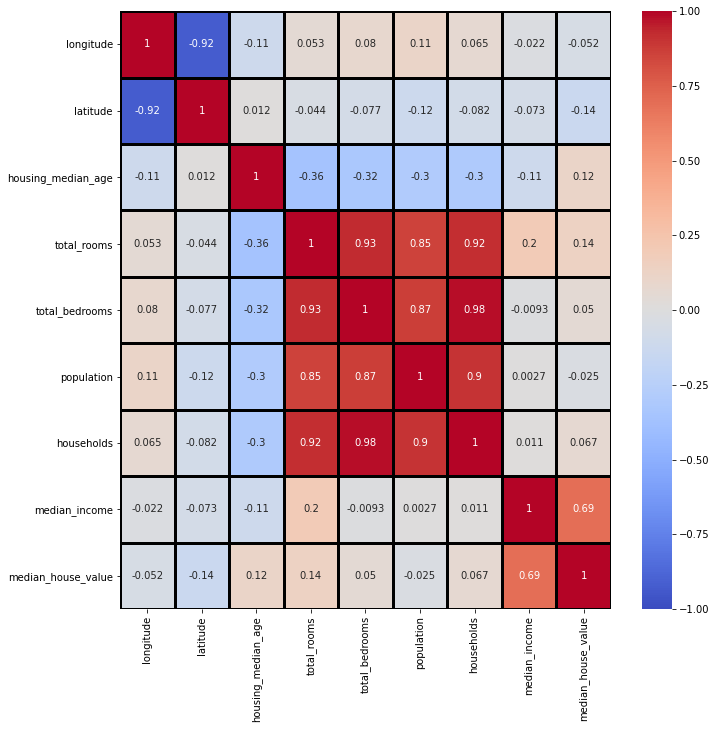

In [32]:
plt.figure(figsize=(11,11))

sns.heatmap(housing.corr(), annot = True,vmin=-1, vmax=1,
            center= 0,cmap= 'coolwarm',linewidths=3, linecolor='black');

In [33]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

corr_matrix = housing.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value          1.000000
median_income               0.687873
rooms_per_household         0.144427
total_rooms                 0.136801
housing_median_age          0.116305
households                  0.066788
total_bedrooms              0.049523
population_per_household   -0.024005
population                 -0.024592
longitude                  -0.052345
latitude                   -0.137864
bedrooms_per_room          -0.262723
Name: median_house_value, dtype: float64


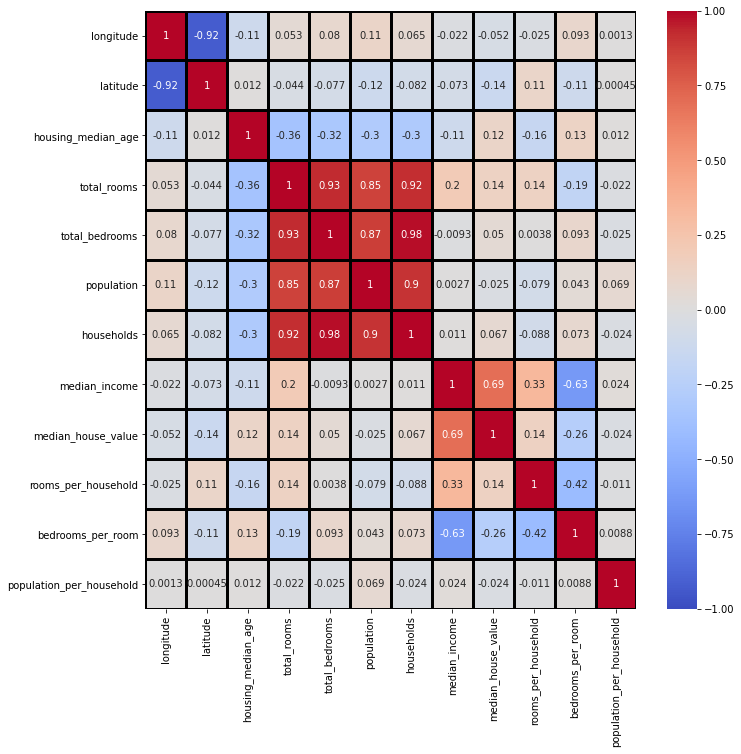

In [34]:
plt.figure(figsize=(11,11))

sns.heatmap(housing.corr(), annot = True,vmin=-1, vmax=1,
            center= 0,cmap= 'coolwarm',linewidths=3, linecolor='black');

In [35]:
print(housing.shape)

(14448, 13)


In [36]:
housing.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              140
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           140
population_per_household      0
dtype: int64

# Data preparation

In [37]:
# Data Preparation
# housing is the training set of the whole data
y_train = housing["median_house_value"] # target
X_train = housing.drop("median_house_value", axis=1) 
#print(" X_train cols : ", X_train.columns)
print("X_train : ", X_train.shape)

median = X_train["total_bedrooms"].median()
X_train["total_bedrooms"].fillna(median, inplace=True)

# Separate into numerical and categorical  dataframes,  to make below transformations using pipelines
housing_num = X_train.drop("ocean_proximity", axis=1)
print("X_train : ", X_train.shape)
print("housing_num : ", housing_num.shape)

X_train :  (14448, 12)
X_train :  (14448, 12)
housing_num :  (14448, 11)


In [38]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# Setting Up a Machine Learning Pipeline

In [39]:
# define pipeline  (numerical cols)
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('scaler', StandardScaler()),
])

# transform training data (numerical part)
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr.shape

(14448, 14)

In [40]:
len(X_train["ocean_proximity"].value_counts())

5

In [44]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num) #column labels
print("num_attribs : ", num_attribs)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])
# transform training data 
housing_prepared = full_pipeline.fit_transform(X_train)

num_attribs :  ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']


In [45]:
housing_prepared.shape # 5 (after encoding) + 14 num_cols

(14448, 19)

# Modeling : Linear Regression

In [50]:
reg = LinearRegression()
reg.fit(housing_prepared, y_train) # # fit on the transformed data

#test data
data = X_train.iloc[:15]
y_true = y_train.iloc[:15]
#transform test data 
data_preparation = full_pipeline.transform(data)
#predict
y_pred = reg.predict(data_preparation)
print("Predictions: ", y_pred)

Predictions:  [381265.71409735 200564.81819969 175340.990482   166350.73949503
 274715.63505749 333166.95970348 145796.10068801 202739.46181699
 224784.8428674  272162.96230759 594608.12089518 184761.30629336
 221476.4192499  117338.85193823 204377.34750254]


In [54]:
list(zip(y_true, y_pred))

[(500001.0, 381265.71409735474),
 (203000.0, 200564.81819968653),
 (192500.0, 175340.990482005),
 (121900.0, 166350.7394950303),
 (250000.0, 274715.63505749067),
 (466900.0, 333166.95970347704),
 (145300.0, 145796.10068801162),
 (139800.0, 202739.461816987),
 (253100.0, 224784.84286739703),
 (299100.0, 272162.9623075933),
 (500001.0, 594608.120895179),
 (137500.0, 184761.3062933578),
 (106300.0, 221476.4192499022),
 (81100.0, 117338.85193822683),
 (154300.0, 204377.34750253987)]

In [57]:
r2_score(y_pred, y_true)

0.6522043592077194

In [62]:
reg.score(housing_prepared, y_train)

0.6523752616817267